## SVM_1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

!gdown 1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo

df = pd.read_csv('Spam_processed.csv', encoding='latin-1')
df.dropna(inplace = True)

print(df)

/Users/nikhilsanghi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Downloading...
From: https://drive.google.com/uc?id=1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_MWF_Intro_to_ML/Supervised_Algorithms/12_SVM_2/Spam_processed.csv
100%|████████████████████████████████████████| 767k/767k [00:00<00:00, 3.21MB/s]
      type                                            message  \
0        0  Go until jurong point, crazy.. Available only ...   
1        0                      Ok lar... Joking wif u oni...   
2        1  Free entry in 2 a wkly comp to win FA Cup fina...   
3        0  U dun say so early hor... U c already then say...   
4        0  Nah I don't think he goes to usf, he lives aro...   
...    ...                                                ...   
5567     1  This is the 2nd time we have tried 2 contact u...   
5568     0              Will Ì_ b going to esplanade fr home?   
5569     0  Pity, * was in mood for that. So...any other s...   
5570     0  The guy did some bitching but I act

In [2]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'],
                                                          test_size=0.25, random_state=47)
print([np.shape(df_X_train), np.shape(df_X_test)])

# CountVectorizer
f = feature_extraction.text.CountVectorizer()
X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

# StandardScaler
scaler = StandardScaler(with_mean=False) # problems with dense matrix
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print([np.shape(X_train), np.shape(X_test)])
print(type(X_train))

[(4173,), (1392,)]
[(4173, 7622), (1392, 7622)]
<class 'scipy.sparse.csr.csr_matrix'>


In [3]:
# SVC

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

params = {
          'C': [1e-4,  0.001, 0.01, 0.1, 1,10] # which hyperparam value of C do you think will work well?
         }

svc = SVC(class_weight={ 0:0.1, 1:0.5 }, kernel='linear')
clf = GridSearchCV(svc, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 0.1, 1: 0.5}, kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [4]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} \n Mean score: {res['mean_test_score'][i]} \n Rank: {res['rank_test_score'][i]}")

Parameters:{'C': 0.0001} 
 Mean score: 0.6566305780023073 
 Rank: 6
Parameters:{'C': 0.001} 
 Mean score: 0.7742322485787693 
 Rank: 1
Parameters:{'C': 0.01} 
 Mean score: 0.767533370474547 
 Rank: 2
Parameters:{'C': 0.1} 
 Mean score: 0.7649416969151316 
 Rank: 3
Parameters:{'C': 1} 
 Mean score: 0.7649416969151316 
 Rank: 3
Parameters:{'C': 10} 
 Mean score: 0.7649416969151316 
 Rank: 3


In [5]:
svc = SVC(C=0.001,class_weight={ 0:0.1, 1:0.5 }, kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.f1_score(y_test,y_pred))

0.8908554572271387


## RBF Function

In [6]:
from IPython.display import IFrame

In [7]:
IFrame(src="https://www.desmos.com/calculator/maidcnyvlz", width=700, height=375)

## SVM_2

### Data 

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

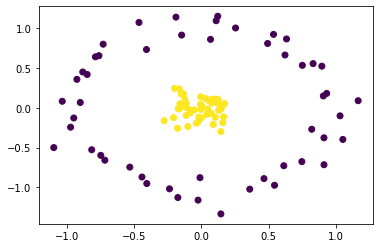

In [9]:
# create a non-linear dataset

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Linear SVM Kernel

In [10]:
from sklearn.svm import SVC

In [11]:
# try using svm with linear kernel
clf = SVC(kernel='linear').fit(X, y)

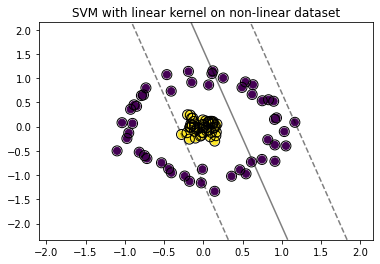

In [12]:
# plot the decision function

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("SVM with linear kernel on non-linear dataset")

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### RBF Kernel

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

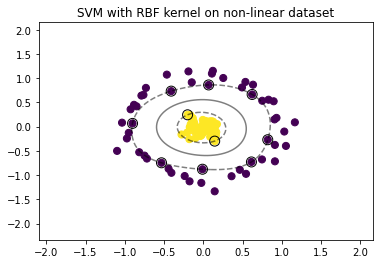

In [14]:
#plot RBF kernel

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("SVM with RBF kernel on non-linear dataset")

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()